Run in R kernal R-Studio

In [ ]:
####R script to allow for R kernal in Jupyter Notebook

install.packages('repr', 'IRdisplay', 'pbdZMQ','devtools')
devtools::install_github('IRkernel/IRkernel')
# or devtools::install_local('IRkernel-master.tar.gz')
IRkernel::installspec()  # to register the kernel in the current R installation
IRkernel::installspec(name = 'ir33', displayname = 'R 3.3')

In [294]:
library(readr)
vegan <- read_csv("C:/Users/James/Desktop/NCI/Semester 1 (23_Jan to 21_May)/Big Bata/Project/vegan.csv")
vegan

Parsed with column specification:
cols(
  .default = col_integer(),
  Atrihas = col_double(),
  Salidol = col_double(),
  Critmar = col_double(),
  Spermar = col_double(),
  Vicisep = col_double(),
  Seduacr = col_double()
)
See spec(...) for full column specifications.


Elymfar,Leymare,Agrosto,Planmar,Salieur,Festrub,Atrihas,Salidol,Elymrep,Tripmar,...,Vicicra,Limobin,Holclan,Rubufru,Planlan,Centrub,Puccdis,Seduacr,Senevul,Trifpra
0,0,0,55,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0,0
0,0,0,15,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0,0
0,0,0,10,0,10,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0,0
0,0,0,5,0,7,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0,0
0,0,0,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0,0
0,0,0,15,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0,0
0,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0,0
0,0,0,0,0,0,30,0,0,0,...,0,0,0,0,0,0,0,0.0,0,0
0,0,0,0,0,0,20,0,0,0,...,0,0,0,0,0,0,0,0.0,0,0
0,0,0,0,0,0,3,0,0,0,...,0,0,0,0,0,20,0,0.0,0,0


In [295]:
library(raster)
p <- shapefile("C:/Users/James/Desktop/NCI/Semester 1 (23_Jan to 21_May)/Big Bata/Project//Releve_ALL.shp")
m <- merge( vegan,p, by.x=000, by.y= "Releve_Cod")

Run in R-Studio Leaflet

In [297]:
###Ran in R-Studio
library(leaflet)
library(dplyr)
leaflet(m) %>% addTiles() %>% addCircles(lng = ~log, lat = ~lat, weight = 1, radius=5)


HTML widgets cannot be represented in plain text (need html)

--https://www.r-bloggers.com/clustergram-visualization-and-diagnostics-for-cluster-analysis-r-code/

In [298]:
 clustergram.kmeans <- function(Data, k, ...)
  {
    # this is the type of function that the clustergram
    # 	function takes for the clustering.
    # 	using similar structure will allow implementation of different clustering algorithms
    
    #	It returns a list with two elements:
    #	cluster = a vector of length of n (the number of subjects/items)
    #				indicating to which cluster each item belongs.
    #	centers = a k dimensional vector.  Each element is 1 number that represent that cluster
    #				In our case, we are using the weighted mean of the cluster dimensions by 
    #				Using the first component (loading) of the PCA of the Data.
    
    cl <- kmeans(Data, k,...)
    
    cluster <- cl$cluster
    centers <- cl$centers %*% princomp(Data)$loadings[,1]	# 1 number per center
    # here we are using the weighted mean for each
    
    return(list(
      cluster = cluster,
      centers = centers
    ))
  }		

clustergram.plot.matlines <- function(X,Y, k.range, 
                                      x.range, y.range , COL, 
                                      add.center.points , centers.points)
{
  plot(0,0, col = "white", xlim = x.range, ylim = y.range,
       axes = F,
       xlab = "Number of clusters (k)", ylab = "PCA weighted Mean of the clusters", main = "Clustergram of the PCA-weighted Mean of the clusters k-mean clusters vs number of clusters (k)")
  axis(side =1, at = k.range)
  axis(side =2)
  abline(v = k.range, col = "grey")
  
  matlines(t(X), t(Y), pch = 19, col = COL, lty = 1, lwd = 1.5)
  
  if(add.center.points)
  {
    require(plyr)
    
    xx <- ldply(centers.points, rbind)
    points(xx$y~xx$x, pch = 19, col = "red", cex = 1.3)
    
    # add points	
    # temp <- l_ply(centers.points, function(xx) {
    # with(xx,points(y~x, pch = 19, col = "red", cex = 1.3))
    # points(xx$y~xx$x, pch = 19, col = "red", cex = 1.3)
    # return(1)
    # })
    # We assign the lapply to a variable (temp) only to suppress the lapply "NULL" output
  }	
}



clustergram <- function(Data, k.range = 2:10 , 
                        clustering.function = clustergram.kmeans,
                        clustergram.plot = clustergram.plot.matlines, 
                        line.width = .004, add.center.points = T)
{
  # Data - should be a scales matrix.  Where each column belongs to a different dimension of the observations
  # k.range - is a vector with the number of clusters to plot the clustergram for
  # clustering.function - this is not really used, but offers a bases to later extend the function to other algorithms 
  #			Although that would  more work on the code
  # line.width - is the amount to lift each line in the plot so they won't superimpose eachother
  # add.center.points - just assures that we want to plot points of the cluster means
  
  n <- dim(Data)[1]
  
  PCA.1 <- Data %*% princomp(Data)$loadings[,1]	# first principal component of our data
  
  if(require(colorspace)) {
    COL <- heat_hcl(n)[order(PCA.1)]	# line colors
  } else {
    COL <- rainbow(n)[order(PCA.1)]	# line colors
    warning('Please consider installing the package "colorspace" for prittier colors')
  }
  
  line.width <- rep(line.width, n)
  
  Y <- NULL	# Y matrix
  X <- NULL	# X matrix
  
  centers.points <- list()
  
  for(k in k.range)
  {
    k.clusters <- clustering.function(Data, k)
    
    clusters.vec <- k.clusters$cluster
    # the.centers <- apply(cl$centers,1, mean)
    the.centers <- k.clusters$centers 
    
    noise <- unlist(tapply(line.width, clusters.vec, cumsum))[order(seq_along(clusters.vec)[order(clusters.vec)])]	
    # noise <- noise - mean(range(noise))
    y <- the.centers[clusters.vec] + noise
    Y <- cbind(Y, y)
    x <- rep(k, length(y))
    X <- cbind(X, x)
    
    centers.points[[k]] <- data.frame(y = the.centers , x = rep(k , k))	
    #	points(the.centers ~ rep(k , k), pch = 19, col = "red", cex = 1.5)
  }
  
  
  x.range <- range(k.range)
  y.range <- range(PCA.1)
  
  clustergram.plot(X,Y, k.range, 
                   x.range, y.range , COL, 
                   add.center.points , centers.points)
  
  
}
  

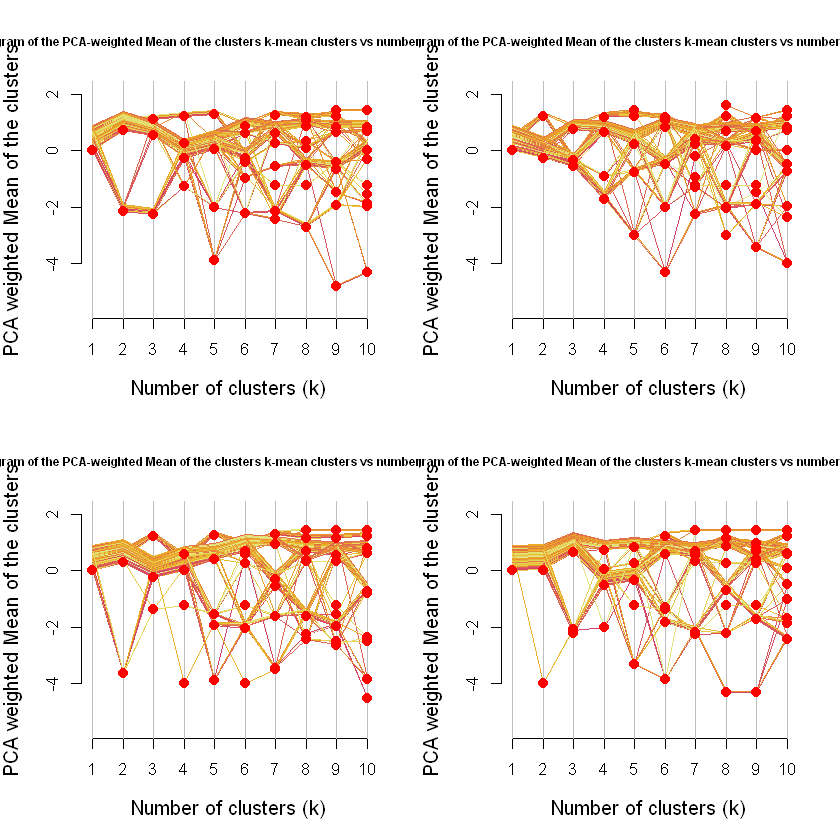

In [299]:
Data <- scale(vegan) 
par(cex.lab = 1.2, cex.main = .7)
par(mfrow = c(2,2))
for(i in 1:4) clustergram(Data, k.range = 1:10, 
                          line.width = .004, add.center.points = T)

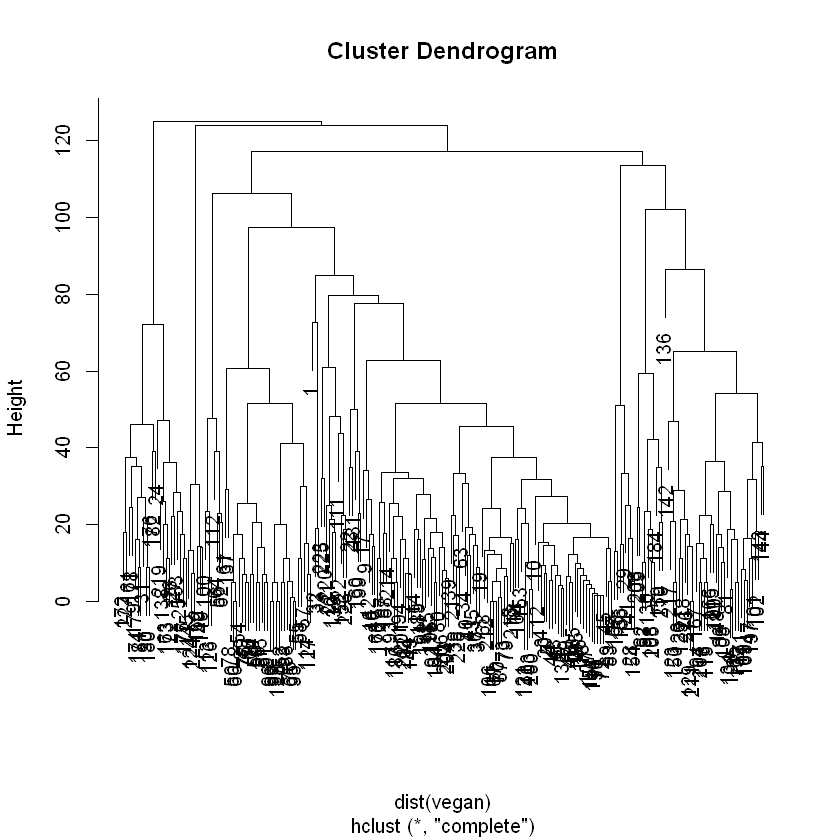

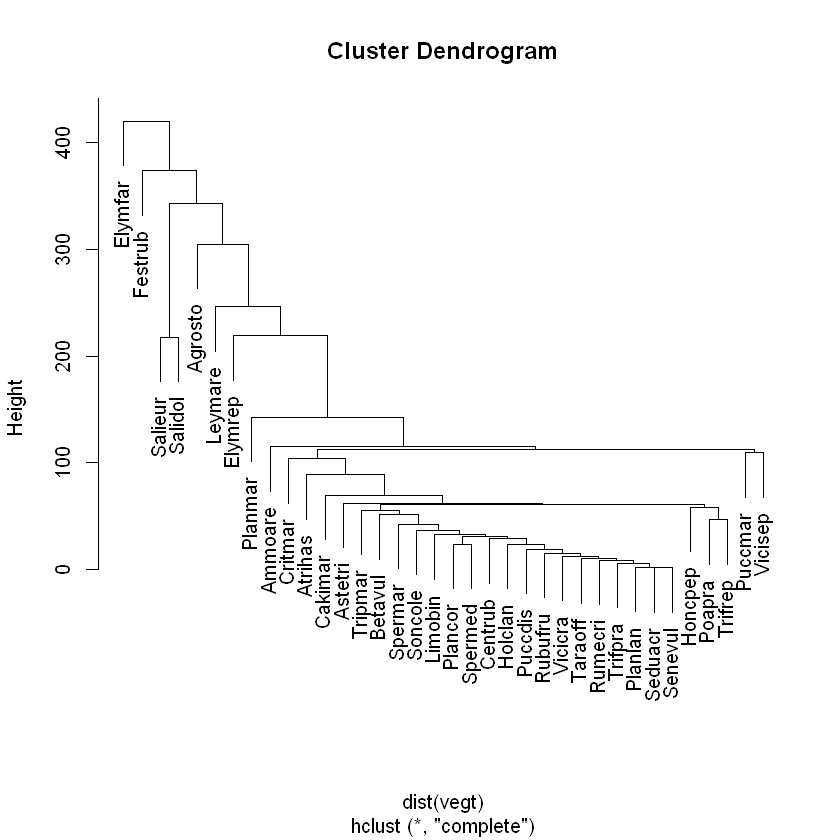

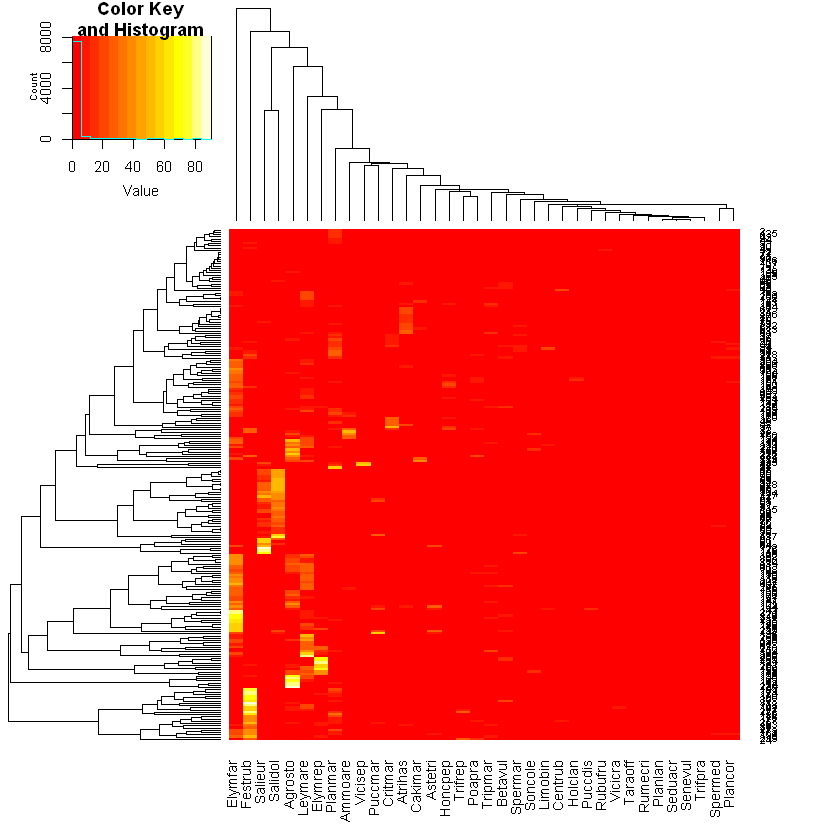

In [300]:
clusters <- hclust(dist(vegan))
plot(clusters)
vegt<-t(vegan)
clustersT <- hclust(dist(vegt))
plot(clustersT)
require(gplots)
data <- as.matrix(vegan)
heatmap.2(data, trace="none")
require(gtools)
require(RColorBrewer)
cols <- colorRampPalette(brewer.pal(10, "RdBu"))(256)
distCor <- function(x) as.dist(1-cor(t(x)))
hclustAvg <- function(x) hclust(x, method="m.ward")

https://cran.r-project.org/web/packages/dendextend/vignettes/Cluster_Analysis.html

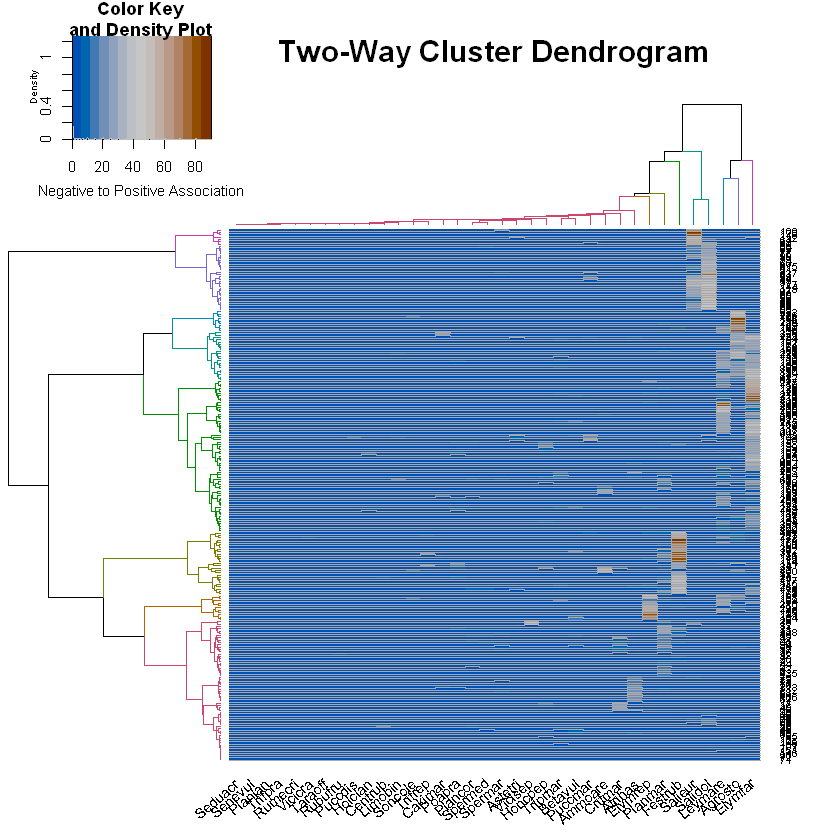

In [301]:
library(gplots)
library(dendextend)
dend_r <- vegan %>% dist(method = "man") %>% hclust(method = "ward.D") %>% as.dendrogram %>% ladderize %>%
  color_branches(k=8)

dend_c <- t(vegan) %>% dist(method = "man") %>% hclust(method = "ward.D") %>% as.dendrogram %>% ladderize%>%
  color_branches(k=8)
some_col_func <- function(n) (colorspace::diverge_hcl(n, h = c(246, 40), c = 96, l = c(30, 80)))

    
library(gplots)
gplots::heatmap.2(as.matrix(vegan), 
                  main = "Two-Way Cluster Dendrogram",
                  srtCol = 40,
                  Rowv = dend_r,
                  Colv = dend_c,
                  trace="row", hline = NA, tracecol = "darkgrey",         
                  margins =c(4,4),      
                  key.xlab = "Negative to Positive Association",
                  denscol = "grey",
                  density.info = "density",
                  col = some_col_func
)

Parsed with column specification:
cols(
  .default = col_integer(),
  Atrihas = col_double(),
  Salidol = col_double(),
  Critmar = col_double(),
  Spermar = col_double(),
  Vicisep = col_double(),
  Seduacr = col_double()
)
See spec(...) for full column specifications.



Call:
metaMDS(comm = vegan, trace = FALSE) 

global Multidimensional Scaling using monoMDS

Data:     wisconsin(sqrt(vegan)) 
Distance: bray 

Dimensions: 2 
Stress:     0.1160114 
Stress type 1, weak ties
No convergent solutions - best solution after 20 tries
Scaling: centring, PC rotation, halfchange scaling 
Species: expanded scores based on 'wisconsin(sqrt(vegan))' 


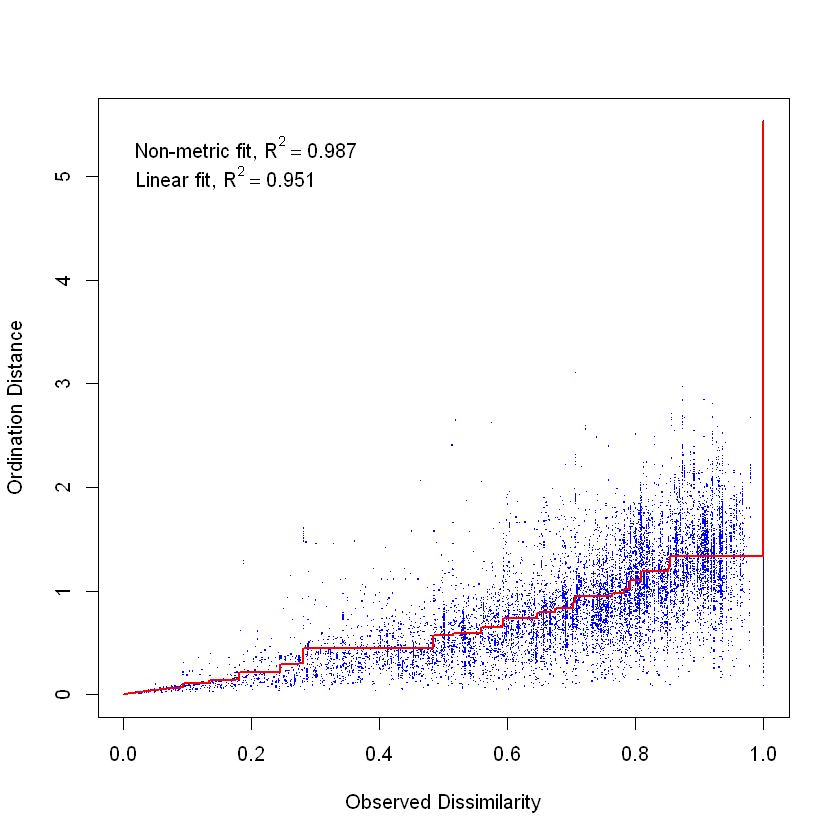

In [302]:
library(readr)
vegan <- read_csv("C:/Users/James/Desktop/NCI/Semester 1 (23_Jan to 21_May)/Big Bata/Project/vegan.csv")
library(vegan)
library(MASS)
veg.mds <- metaMDS(vegan, trace = FALSE)
veg.mds
stressplot(veg.mds)

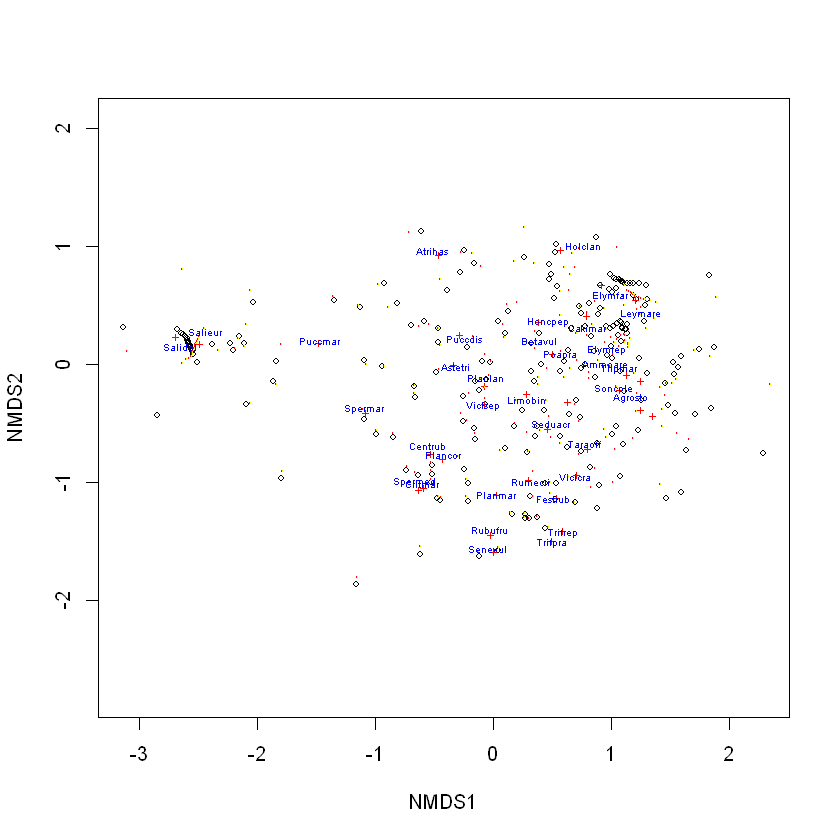

In [303]:
plot(veg.mds)
points(ord, display = "sites", cex = 0.2, pch=21, col="red", bg="yellow")
text(ord, display = "spec", cex=0.5, col="blue")


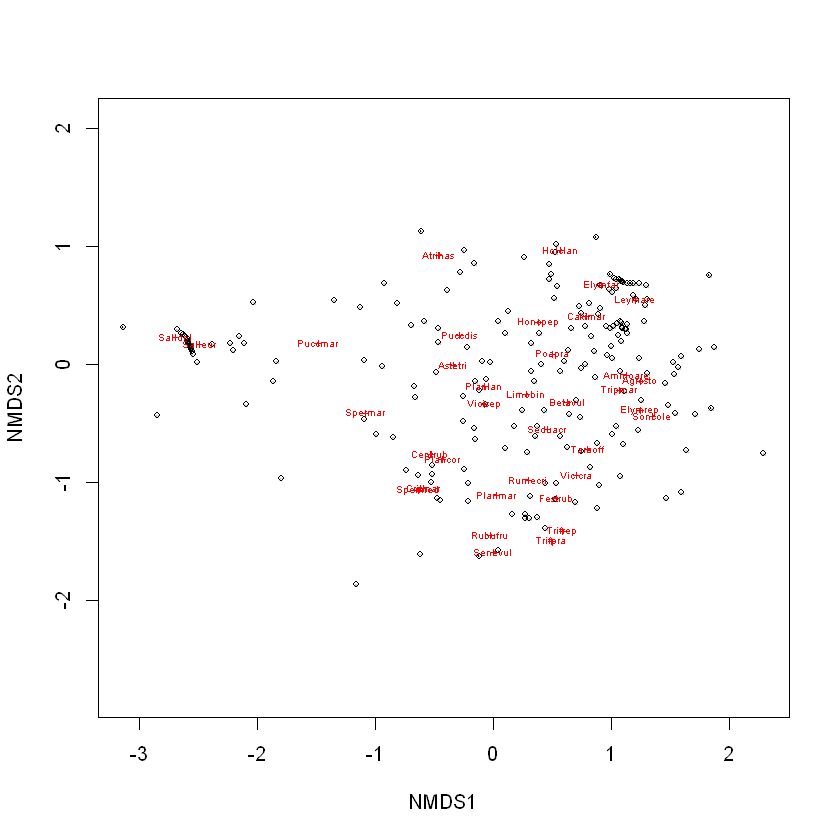

In [304]:
ordiplot(veg.mds)
orditorp(veg.mds,display="species",col="red",cex=0.5,air=0.01)
orditorp(veg.mds,display="sites",cex=0.2,air=0.01)

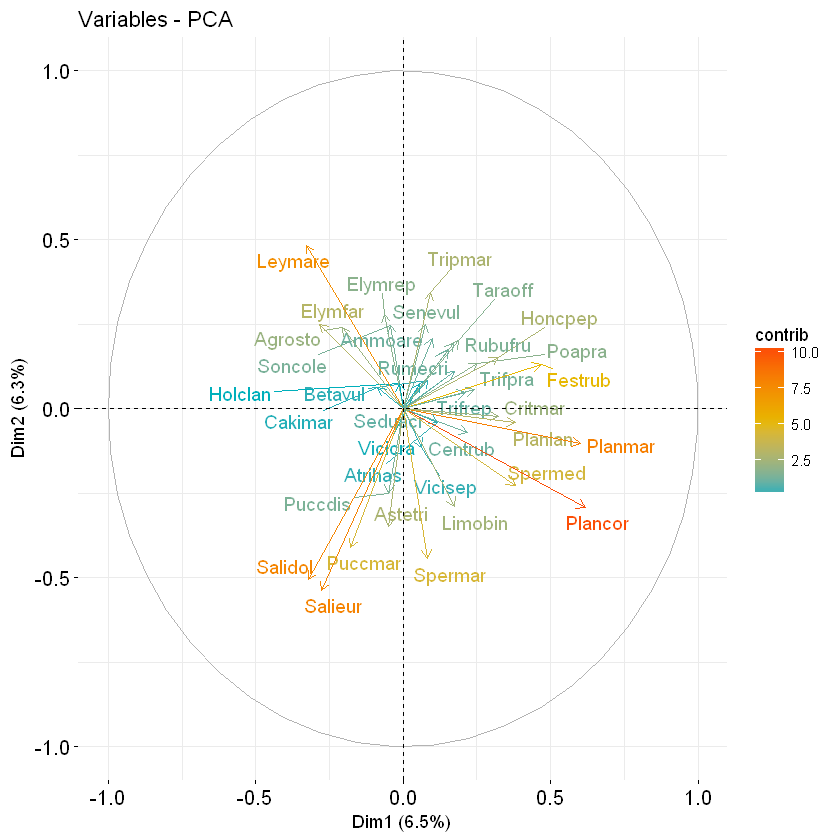

In [305]:
library("FactoMineR")
library("factoextra")
res.pca <- PCA(vegan,  graph = FALSE)
fviz_pca_var(res.pca, col.var="contrib",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE # Avoid text overlapping)
             )

In [306]:
library(indicspecies)

In [307]:
vegkm = kmeans(vegan, centers=10)
vegan$R_cluster=vegkm$cluster
indval = multipatt(vegan, groupskm, control = how(nperm=999))
summary(indval, indvalcomp=TRUE)
summary(indval, alpha=1)
indval$sign


 Multilevel pattern analysis
 ---------------------------

 Association function: IndVal.g
 Significance level (alpha): 0.05

 Total number of species: 37
 Selected number of species: 13 
 Number of species associated to 1 group: 8 
 Number of species associated to 2 groups: 3 
 Number of species associated to 3 groups: 0 
 Number of species associated to 4 groups: 1 
 Number of species associated to 5 groups: 1 
 Number of species associated to 6 groups: 0 
 Number of species associated to 7 groups: 0 
 Number of species associated to 8 groups: 0 
 Number of species associated to 9 groups: 0 

 List of species associated to each combination: 

 Group 3  #sps.  3 
             A      B  stat p.value    
Festrub 0.8804 1.0000 0.938   0.001 ***
Trifrep 0.8645 0.2857 0.497   0.027 *  
Vicicra 0.9592 0.1905 0.427   0.032 *  

 Group 4  #sps.  1 
             A      B  stat p.value    
Elymrep 0.8618 1.0000 0.928   0.001 ***

 Group 5  #sps.  2 
             A      B  stat p.value   
Puccm

,s.1,s.2,s.3,s.4,s.5,s.6,s.7,s.8,s.9,s.10,index,stat,p.value
Elymfar,1,1,0,0,1,0,1,0,0,0,190,0.9346376,0.001
Leymare,1,1,0,1,0,0,1,1,0,0,416,0.8420900,0.001
Agrosto,0,0,0,0,0,0,0,1,0,0,8,0.8331448,0.001
Planmar,0,0,1,0,0,1,0,0,0,0,30,0.6509664,0.027
Salieur,0,0,0,0,0,0,0,0,0,1,10,0.9453231,0.001
Festrub,0,0,1,0,0,0,0,0,0,0,3,0.9383213,0.001
Atrihas,0,0,0,0,1,0,0,0,1,0,44,0.9427888,0.001
Salidol,0,0,0,0,1,0,0,0,0,1,45,0.9141045,0.001
Elymrep,0,0,0,1,0,0,0,0,0,0,4,0.9283304,0.001
Tripmar,1,1,1,0,0,0,1,0,1,0,402,0.3832478,0.177


In [308]:

vegan$R_cluster=vegkm$cluster
vegan

Elymfar,Leymare,Agrosto,Planmar,Salieur,Festrub,Atrihas,Salidol,Elymrep,Tripmar,...,Limobin,Holclan,Rubufru,Planlan,Centrub,Puccdis,Seduacr,Senevul,Trifpra,R_cluster
0,0,0,55,0,0,0,0,0,0,...,0,0,0,0,0,0,0.0,0,0,9
0,0,0,15,0,0,0,0,0,0,...,0,0,0,0,0,0,0.0,0,0,9
0,0,0,10,0,10,0,0,0,0,...,0,0,0,0,0,0,0.0,0,0,9
0,0,0,5,0,7,0,0,0,0,...,0,0,0,0,0,0,0.0,0,0,9
0,0,0,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0.0,0,0,7
0,0,0,15,0,0,0,0,0,0,...,0,0,0,0,0,0,0.0,0,0,9
0,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0.0,0,0,7
0,0,0,0,0,0,30,0,0,0,...,0,0,0,0,0,0,0.0,0,0,7
0,0,0,0,0,0,20,0,0,0,...,0,0,0,0,0,0,0.0,0,0,7
0,0,0,0,0,0,3,0,0,0,...,0,0,0,0,20,0,0.0,0,0,7


In [ ]:
indval = multipatt(vegan, groupskm, control = how(nperm=999))


In [ ]:
summary(indval, indvalcomp=TRUE)


In [ ]:
summary(indval, alpha=1)


In [ ]:
indval$sign

In [ ]:
vegkm = kmeans(vegan, centers=10)
vegan$R_cluster=vegkm$cluster
indval = multipatt(vegan, groupskm, control = how(nperm=999))
summary(indval, indvalcomp=TRUE)
summary(indval, alpha=1)
indval$sign
library(raster)
p <- shapefile("C:/Users/James/Desktop/NCI/Semester 1 (23_Jan to 21_May)/Big Bata/Project//Releve_ALL.shp")
m <- merge( vegan,p, by.x=000, by.y= "Releve_Cod")

 run in r-studio leaflet

Graph in R-Studio

In [ ]:
clustersT <- hclust(dist(vegan))
groups <- cutree(clustersT, k=9) # cut tree into 9 clusters
vegan$R_cluster=groups
library(raster)
p <- shapefile("C:/Users/James/Desktop/NCI/Semester 1 (23_Jan to 21_May)/Big Bata/Project//Releve_ALL.shp")
m <- merge( vegan,p, by.x=000, by.y= "Releve_Cod")###Ran in R-Studio
library(RColorBrewer)
library(leaflet)
library(dplyr)
colorsmap = colors()[1:length(unique(m$R_cluster))]
groupColors = colorFactor(palette = "Set2", domain = m$R_cluster)
map2<-leaflet(m) %>% addTiles()  %>% addCircles(lng = ~log, lat = ~lat, weight = 5,
                                               radius=1,color = ~groupColors(R_cluster), group= ~R_cluster )%>%
  addLegend(position = "topright", pal = groupColors, values = ~R_cluster) %>%
  addLayersControl(~R_cluster)
map2 %>% addProviderTiles(providers$CartoDB.Positron)